# 1. Import Dependent Libraries

In [5]:
import pandas as pd
#from pandas import json_normalize
import numpy as np
import datetime as dt
#import csv

%matplotlib inline
import matplotlib.pyplot as plt
import plotly as px
from matplotlib import style
import seaborn as sns 
import plotly.express as pxx

Resolve issue with pandas package

In [140]:
from importlib.machinery import SourceFileLoader

# imports the module from the given path
foo = SourceFileLoader("pandas","/Users/adarshkp/opt/anaconda3/lib/python3.8/site-packages/pandas/__init__.py").load_module()
print(pd.__file__)
#dir(pd)

import warnings
warnings.filterwarnings('ignore')

/Users/adarshkp/opt/anaconda3/lib/python3.8/site-packages/pandas/__init__.py


# 2. Importing 311 Service Requests Data

#### Comments: I tried at least 4 methods for the analysis including SODA API/JSON objects parsing, Google-colab/Google Drive, AWS EC2 server+FTP/SCP, Pandas on local server as the dataset is large. The cloud tools I used were free versions so it kept disconnecting. Finally had to create a concise dataset and use it for the analysis on my local machine

#### 2.1. Import data from Socrata Open Data API (Soda)

In [4]:
# from sodapy import Socrata #install sodapy from pip and then import dataset

# client = Socrata("data.cityofnewyork.us", None)
# client.timeout = 1000
# results = client.get("erm2-nwe9", limit=1500000)
# df = pd.DataFrame.from_records(results)

#### 2.2. Google-colab authorization and importing data from Google Drive

In [5]:
# from pydrive.auth import GoogleAuth #!pip install -U -q PyDrive
# from pydrive.drive import GoogleDrive
# from google.colab import auth #!pip install google-colab
# from oauth2client.client import GoogleCredentials

# #to import files from google drive
# from google.colab import drive
# drive.mount('/content/gdrive')
# df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/311_Service_Requests_from_2010_to_Present.csv')
#### 
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

#### 2.3. Importing JSON objects using API and flattening 
#### --Only imports first 1000 obs--

In [6]:
# import requests
# import json
# Data_API = requests.get('https://data.cityofnewyork.us/resource/erm2-nwe9.json')
# Data = Data_API.text
# parse_json=json.loads(Data) #parses the json objects
# df = json_normalize(parse_json) #flatterns the json object to form a dataframe

#### 2.4. Importing data from a csv file in a local directory

In [16]:
df=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
#print(df.columns) #prints column names

#include only essential columns
df = df[['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type', 'Descriptor', 'Borough',
         'Incident Zip','Latitude', 'Longitude', 'Location']]


Borough_list=['BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND']
df=df[df['Borough'].isin(Borough_list)] #drops observations of boroughs not in the above list

print(df.shape) #dimensions of the dataframe
print(df.info()) #gives basic characteristics of the dataset
#df.describe().loc[['mean','std', 'min', 'max']] #summary statistics

#df['created_date'] = pd.to_datetime(df['created_date']) #converts to time object 
#df['closed_date'] = pd.to_datetime(df['closed_date'])
#df['Request_Duration'] = df['created_date'] - df['closed_date'] #creates a new variable-Request_Duration
#print(df.iloc[1,:]) #prints first row of the dataset


(25839156, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25839156 entries, 0 to 27116296
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unique Key      int64  
 1   Created Date    object 
 2   Closed Date     object 
 3   Agency          object 
 4   Complaint Type  object 
 5   Descriptor      object 
 6   Borough         object 
 7   Incident Zip    object 
 8   Latitude        float64
 9   Longitude       float64
 10  Location        object 
dtypes: float64(2), int64(1), object(8)
memory usage: 2.3+ GB
None


# 3. Checking for missing values 

####      --yellow color in the below plot represents missing values--

In [68]:
plt.figure(figsize=(8, 8))      #figsize in inches
sns.heatmap(df.isnull(),xticklabels=True,cbar=False,cmap='viridis') #heat map of missing data
plt.show()

#### Comments: From the above plot, it seems like there are not many missing observations in the key variables about to be used in this analysis




# 4. 2017 Reporting
## 4.1. Question-1

#### 4.1.1. Create year and month variables and estimate number of observations by each year

In [ ]:
df['Year_month'] = pd.DatetimeIndex(df['Created Date']).strftime('%Y-%m')
df['Year'] = pd.DatetimeIndex(df['Created Date']).year #creates year variable
df['Month'] = pd.DatetimeIndex(df['Created Date']).month #creates month variable
df.to_csv('df.csv', index=False) #saves the above file in csv format
#type(data)#### 
#df['Year'].value_counts() #num of observations by each year

In [32]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Borough,Incident Zip,Latitude,Longitude,Location,Year_month,Year,Month
0,21739884,10/26/2011 07:31:00 PM,12/23/2011 12:00:00 PM,DSNY,Dirty Conditions,E12 Illegal Dumping Surveillance,BRONX,10458,40.855093,-73.884935,"(40.85509340131799, -73.88493530762781)",2011-10,2011,10
1,21738939,10/26/2011 10:31:00 AM,10/26/2011 01:10:00 PM,DEP,Sewer,Sewer Backup (Use Comments) (SA),QUEENS,11102,40.771719,-73.924194,"(40.77171927047292, -73.92419376703837)",2011-10,2011,10
2,21738160,10/26/2011 12:00:00 AM,11/10/2011 12:00:00 AM,HPD,PLUMBING,WATER-LEAKS,BROOKLYN,11225,40.660516,-73.944292,"(40.660515782814635, -73.9442916673507)",2011-10,2011,10
3,21738643,10/26/2011 12:00:00 AM,10/26/2011 12:00:00 AM,HPD,HEATING,HEAT,BROOKLYN,11236,40.631104,-73.907929,"(40.631104004393514, -73.90792864374247)",2011-10,2011,10
4,21739724,10/26/2011 12:00:00 AM,10/31/2011 12:00:00 AM,HPD,HEATING,HEAT,BRONX,10456,40.824868,-73.908380,"(40.824867693955554, -73.90837957440094)",2011-10,2011,10


#### 4.1.2. Plot to obtain the top 10 complaints by frequency count in 2017

In [34]:
df_2017=df[df['Year']==2017]
df_2017.shape

(2452951, 14)

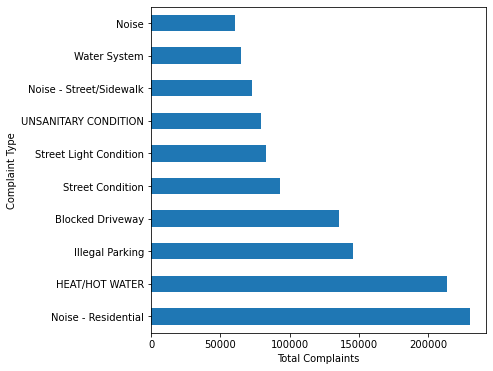

In [66]:
top_complaints=df_2017['Complaint Type'].value_counts()[:10].index.tolist() #list with names of the complaints

#plot for the top complaints in 2017
plt.figure(figsize=(6,6))      #figsize in inches
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df_2017['Complaint Type'].value_counts()[:10].plot(kind='barh') #plot
plt.xlabel('Total Complaints')
plt.ylabel('Complaint Type')
plt.show()

#### 4.1.3. Number of complaints of the top 10 complaint types by each borough in 2017

In [59]:
#Filter the observations having complaint type from the top complaints list
df2_2017=df_2017[df_2017['Complaint Type'].isin(top_complaints)] 
df3_2017 = df2_2017.groupby(['Complaint Type','Borough']) #grouping by 2 columns -'Complaint Type','Borough'
df4_2017=df3_2017.size().unstack() #Borough_level_complaint_frequency
df4_2017.reset_index(inplace=False) #converts labels to column
df4_2017

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
Complaint Type,,,,,
Blocked Driveway,24615,49432,3434,54413,3795
HEAT/HOT WATER,68718,66984,46529,29217,2073
Illegal Parking,16148,55516,19750,46169,8069
Noise,3134,15421,29002,10684,1926
Noise - Residential,57704,67687,51078,46425,7038
Noise - Street/Sidewalk,14029,21328,29175,7532,868
Street Condition,11761,25432,14840,30637,10595
Street Light Condition,18410,22458,11077,24258,6604
UNSANITARY CONDITION,24561,26659,14635,11474,1953


#### 4.1.4.  plot grouped bar chart of the above dataframe

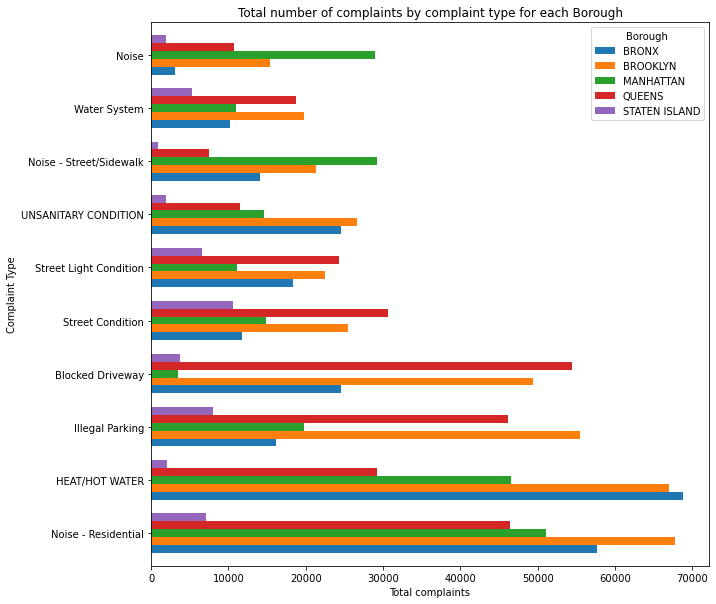

In [71]:
(df4_2017.reindex(index=df4_2017.mean(axis=1)
    .sort_values(ascending=False)
    .index).plot(kind='barh', figsize=(10, 10), width=0.75,
                 title='Total number of complaints by complaint type for each Borough'))
plt.xlabel('Total complaints')
plt.show()

#### Comments: From the above two plots, it is evident that the highest complaint type in 2017 across all the boroughs in NYC is Noise - Residential, followed by Heat/Hot water, Illegal parking, and the others.

# 4.2. Question-2

#### 4.2.1. Import population data and convert merging keys to same data type

In [141]:
pop=pd.read_csv('2010_Census_Population_By_Zipcode.csv')
pop=pop.dropna() #delete rows with missing values
#drop rows with population=0, otherwise it creates complaint-index = infinity
pop.drop(pop[pop['2010 Census Population'] == 0].index, inplace = True) 
print(pop.shape)
print(pop.columns) #column names
pop=pop.rename(columns={'Zip Code ZCTA': 'Incident Zip', '2010 Census Population': 'Population'}) #renaming columns
df_2017['Incident Zip']= pd.to_numeric(df_2017['Incident Zip'], errors='coerce') #convert string to numeric

(32948, 2)
Index(['Zip Code ZCTA', '2010 Census Population'], dtype='object')


#### 4.2.2. Form unique zipcode & borough combination table from the original 311 service request dataset

In [75]:
Borough_Zip=df_2017[['Borough','Incident Zip']].drop_duplicates()
Borough_Zip=Borough_Zip.dropna() #dropping rows with missing values
Borough_Zip.head()

,Borough,Incident Zip
1268,BRONX,10453.0
5264,BROOKLYN,11221.0
15238,QUEENS,11422.0
15367,QUEENS,11411.0
18724,BROOKLYN,11225.0


#### 4.2.3. Calculate total number of complaints by zip code

In [76]:
total_complaints_freq_all = df_2017['Incident Zip'].value_counts().tolist() #list with frequencies of the complaints
total_complaints_all = df_2017['Incident Zip'].value_counts().index.tolist() #list with index of zipcodes
total_complaints_freq_all =pd.DataFrame(total_complaints_freq_all, columns=['num_complaints'])
total_complaints_all =pd.DataFrame(total_complaints_all, columns=['Incident Zip'])
df5_2017 = pd.concat([total_complaints_all, total_complaints_freq_all], axis=1)
df5_2017.shape
#data2.head()

(265, 2)

#### 4.2.4. Merge population dataset with the above total complaints dataset using zip code as the key

In [85]:
df6_2017=df5_2017.merge(pop, on='Incident Zip', how='left') #Left join merge
print(pop.shape)
print(df6_2017.shape) #checking if the merged table has same no. of obs as the left-side dataset
df6_2017.head()

(32948, 2)
(265, 3)


,Incident Zip,num_complaints,Population
0,11226.0,42462,101572.0
1,11385.0,35293,98592.0
2,10467.0,34257,97060.0
3,11207.0,31063,93386.0
4,10453.0,29844,78309.0


#### 4.2.5. Merging Borough table with total complaints dataset (data3) to estimate complaint-index for each borough of NYC

In [110]:
df7_2017=df6_2017.merge(Borough_Zip, on='Incident Zip', how='left') #Left join merge
df7_2017.head()
df7_2017=df7_2017.dropna() 
df8_2017=df7_2017.groupby(['Borough'])[['num_complaints','Population']].sum()
df8_2017['complaint_index']=df8_2017['num_complaints']/df8_2017['Population']
print(Borough_Zip.shape)
print(df8_2017.shape) #checking if the merged table has same no. of obs as the left-side dataset
df8_2017.reset_index(inplace=True) #converts labels to column
df9_2017=df8_2017[['Borough','complaint_index']]
df9_2017.head()
#print(type(data6))
#print(data6.shape)

(297, 2)
(5, 3)


,Borough,complaint_index
0,BRONX,0.293921
1,BROOKLYN,0.300462
2,MANHATTAN,0.295520
3,QUEENS,0.251499
4,STATEN ISLAND,0.275267


#### 4.2.6. plotting the above dataset

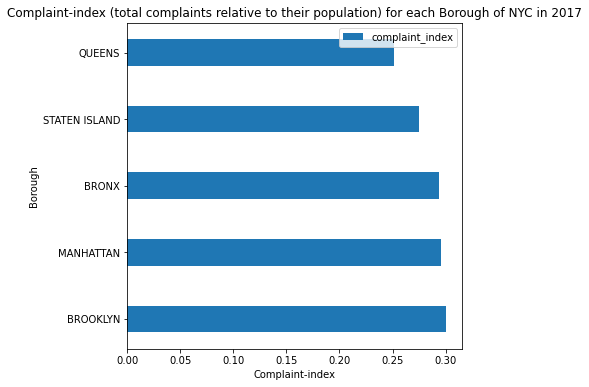

In [142]:
(df9_2017.reindex(index=df9_2017.mean(axis=1)
    .sort_values(ascending=False)
    .index).set_index('Borough').plot(kind='barh', figsize=(6,6), width=0.4)) #renaming bar plot index values
plt.ylabel('Borough')
plt.xlabel('Complaint-index')
plt.title("Complaint-index (total complaints relative to their population) for each Borough of NYC in 2017") 
plt.show()

#### Comments: From the above plot, Brooklyn has the most number of complaints relative to the size of its population in 2017, followed by Manhattan, Bronx, Staten Island and Queens.

# 4.3. Question-3
### Here, I will analyze the two highest complaint types- 'Blocked Driveway' & 'Illegal Parking'

#### 4.3.1. Calculate total number of complaints by complaint type by zipcode

In [145]:
ct_total_complaints_freq_all = df_2017[['Incident Zip','Complaint Type']].value_counts().tolist() #list with frequencies of the complaints
ct_total_complaints_all = df_2017[['Incident Zip','Complaint Type']].value_counts().index.tolist() #list with index of zipcodes
ct_total_complaints_freq_all =pd.DataFrame(ct_total_complaints_freq_all, columns=['num_complaints'])
ct_total_complaints_all =pd.DataFrame(ct_total_complaints_all, columns=['Incident Zip','Complaint Type'])
df10_2017 = pd.concat([ct_total_complaints_all, ct_total_complaints_freq_all], axis=1)
df11_2017=df10_2017[df10_2017['Complaint Type'].isin(['Blocked Driveway','Illegal Parking'])]
print(df11_2017.shape)
df11_2017.head()

(391, 3)


,Incident Zip,Complaint Type,num_complaints
14,11368.0,Blocked Driveway,4388
18,11385.0,Illegal Parking,4136
30,11209.0,Illegal Parking,3289
35,11214.0,Illegal Parking,3159
40,11223.0,Illegal Parking,3082


#### 4.3.2. Merge poulation dataset with the above total complaints dataset using zip code as key

In [129]:
df12_2017=df11_2017.merge(pop, on='Incident Zip', how='left') #Left join merge
print(pop.shape)
print(df12_2017.shape) #checking if the merged table has same no. of obs as the left-side dataset

(32948, 2)
(391, 4)


#### 4.3.3. Merging Borough table with the total complaints dataset (data9) to estimate complaint-index by each Borough in 2017

In [139]:
df13_2017=df12_2017.merge(Borough_Zip, on='Incident Zip', how='left') #Left join merge
df13_2017=df13_2017.dropna() 

#aggregating num_complaints and population by borough, complaint_type
df14_2017=df13_2017.groupby(['Borough','Complaint Type'])[['num_complaints','Population']].sum()
#print(type(data5))
df14_2017['complaint_index']=df14_2017['num_complaints']/df14_2017['Population']
print(Borough_Zip.shape)
print(df14_2017.shape) #checking if the merged table has same no. of obs as the left-side dataset
df14_2017.reset_index(inplace=True) #converts labels to column
df15_2017=df14_2017[['Borough','Complaint Type','complaint_index']]

#convert the dataframe long to wide format for plots
df16_2017=df15_2017.pivot(index='Borough', columns='Complaint Type', values='complaint_index') 
df16_2017.reset_index(inplace=True) #converts labels to column
print(df16_2017.head())

(297, 2)
(10, 3)
Complaint Type        Borough  Blocked Driveway  Illegal Parking
0                       BRONX          0.018628         0.014703
1                    BROOKLYN          0.020716         0.022961
2                   MANHATTAN          0.007277         0.017189
3                      QUEENS          0.023000         0.019339
4               STATEN ISLAND          0.008096         0.017215


#### 4.3.4. Plotting the above dataframe

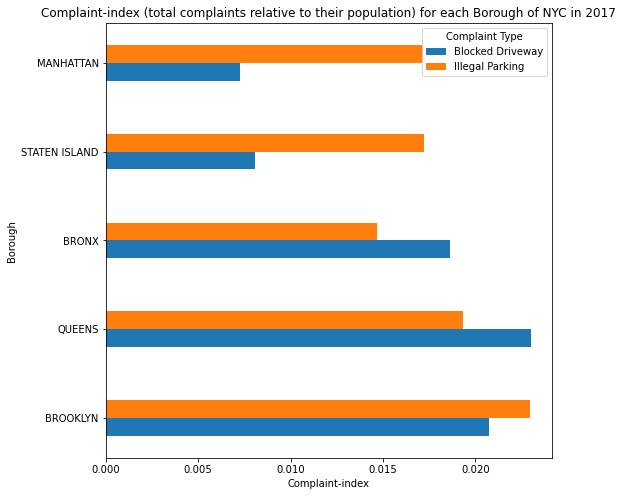

In [147]:
(df16_2017.reindex(index=df16_2017.mean(axis=1)
    .sort_values(ascending=False)
    .index).set_index('Borough').plot(kind='barh', figsize=(8, 8), width=0.4,
            title='Complaint-index (total complaints relative to their population) for each Borough of NYC in 2017'))
plt.xlabel('Complaint-index')
plt.show()

#### Comments: My assumption was that the boroughs with highest complaints about 'Blocked Driveway' have the highest complaints about 'IIlegal Parking' and vice-versa, as they are both related. From the above plot, my assumption appears to be true, as Brooklyn and Quuens have the highest complaints about both the types, wheras the other three boroughs have lesser complaints about the two complaint types. With regard to the variance of the complaint-indices, the level of illegal parking seems to be almost the same across all the boroughs in NYC but the variance for Blocked Driveway complaints is large.


# 5. Time Series / Exploratory Analysis (Monthly analysis in 2021)
## 5.1. Question-1

#### 5.1.1. Create a subset which has complaint descriptor variable - 'Loud music/Party'

In [150]:
Loud_music=df[df['Descriptor'].isin(['Loud Music/Party'])]
Loud_music['Incident Zip']= pd.to_numeric(Loud_music['Incident Zip'], errors='coerce') #convert string to numeric
Loud_music.shape

(2749681, 14)

#### 5.1.2. Calculate total number of complaints by descriptor by zipcode each month in 2021

In [151]:
LM_total_complaints_freq_all = Loud_music[['Incident Zip','Year_month','Year','Month']].value_counts().tolist() #list with frequencies of the complaints
LM_total_complaints_all = Loud_music[['Incident Zip','Year_month','Year','Month']].value_counts().index.tolist() #list with index of zipcodes
LM_total_complaints_freq_all =pd.DataFrame(LM_total_complaints_freq_all, columns=['num_complaints'])
LM_total_complaints_all =pd.DataFrame(LM_total_complaints_all, columns=['Incident Zip','Year_month','Year','Month'])
Loud_music2 = pd.concat([LM_total_complaints_all, LM_total_complaints_freq_all], axis=1)
print(Loud_music2.shape)
Loud_music2.head()

(25473, 5)


,Incident Zip,Year_month,Year,Month,num_complaints
0,10466.0,2020-08,2020,8,16766
1,10466.0,2021-07,2021,7,14477
2,10466.0,2020-09,2020,9,13779
3,10466.0,2020-07,2020,7,12049
4,10466.0,2021-09,2021,9,9195


#### 5.1.3. Merge Loud music dataset with population & Borough-Zip datasets

In [152]:
Loud_music3=Loud_music2.merge(pop, on='Incident Zip', how='left')
Loud_music4=Loud_music3.merge(Borough_Zip, on='Incident Zip', how='left') #Left join merge
Loud_music4=Loud_music4.dropna() 
Loud_music4.head()

,Incident Zip,Year_month,Year,Month,num_complaints,Population,Borough
0,10466.0,2020-08,2020,8,16766,67813.0,BRONX
1,10466.0,2021-07,2021,7,14477,67813.0,BRONX
2,10466.0,2020-09,2020,9,13779,67813.0,BRONX
3,10466.0,2020-07,2020,7,12049,67813.0,BRONX
4,10466.0,2021-09,2021,9,9195,67813.0,BRONX


#### 5.1.4. Create complaint-index variable & complaint-rate variable to form dataset by borough

In [153]:
#aggregating num_complaints and population by borough, month, year
Loud_music5=Loud_music4.groupby(['Borough','Year_month','Month','Year'])[['num_complaints','Population']].sum()

#complaint-index variable
Loud_music5['complaint_index']=Loud_music5['num_complaints']/Loud_music5['Population']

#adding lag of complaint_index variable by zipcode by month
Loud_music5['complaint_index_1']=Loud_music5.sort_values(['Borough','Year_month','Month','Year'],ascending=True)['complaint_index'].shift(1)

#add complaint-rate variable
#complaint-rate=change in complaints relative to population from last month to the current month
Loud_music5['complaint_rate']=Loud_music5['complaint_index']-Loud_music5['complaint_index_1']

Loud_music5 = Loud_music5.sort_values(['Borough','Year_month','Month','Year'],ascending=True) #sort by group
Loud_music5.reset_index(inplace=True) #converts labels to column
Loud_music5.head()

,Borough,Year_month,Month,Year,num_complaints,Population,complaint_index,complaint_index_1,complaint_rate
0,BRONX,2010-01,1,2010,2335,1828343.0,0.001277,NaN,NaN
1,BRONX,2010-02,2,2010,2200,1828343.0,0.001203,0.001277,-0.000074
2,BRONX,2010-03,3,2010,2165,1805421.0,0.001199,0.001203,-0.000004
3,BRONX,2010-04,4,2010,2614,1828343.0,0.001430,0.001199,0.000231
4,BRONX,2010-05,5,2010,2780,1828343.0,0.001521,0.001430,0.000091


#### 5.1.5. Plotting the above dataframe (by Borough)

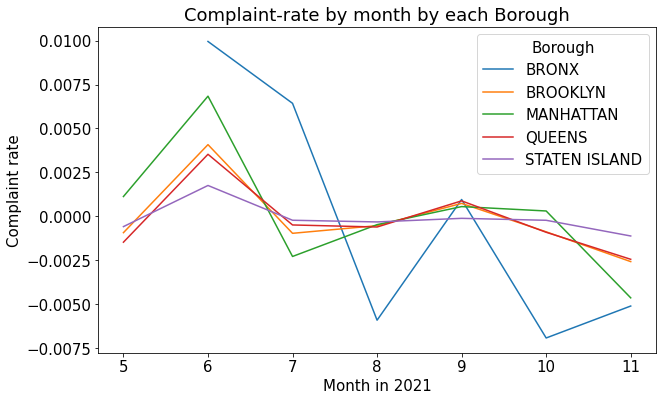

In [129]:
fig, ax = plt.subplots(figsize=(10,6))

for name, group in Loud_music6.groupby('borough'):
    group.plot(x='month', y='complaint_rate', ax=ax, label=name)

plt.xlabel('Month in 2021')
plt.ylabel('Complaint rate')
plt.legend(title = "Borough")
plt.title("Complaint-rate by month by each Borough") 
plt.show()

#### 5.1.6. Create complaint-index variable & complaint-rate variable to form dataset for entire city

In [133]:
#aggregating num_complaints and population by borough, month, year
Loud_music7=Loud_music4.groupby(['month','year'])[['num_complaints','Population']].sum()

#complaint-index variable
Loud_music7['complaint_index']=Loud_music7['num_complaints']/Loud_music7['Population']

#adding lag of complaint_index variable by zipcode by month
Loud_music7['complaint_index_1']=Loud_music7.sort_values(['month','year'],ascending=True)['complaint_index'].shift(1)

#add complaint-rate variable
#complaint-rate=change in complaints relative to population from last month to the current month
Loud_music7['complaint_rate']=Loud_music7['complaint_index']-Loud_music7['complaint_index_1']

Loud_music7 = Loud_music7.sort_values(['month','year'],ascending=True) #sort by group
Loud_music7.reset_index(inplace=True) #converts labels to column

Loud_music7.head()

,month,year,num_complaints,Population,complaint_index,complaint_index_1,complaint_rate
0,5,2021,19018,9771623.0,0.001946,NaN,NaN
1,6,2021,68901,9788991.0,0.007039,0.001946,0.005092
2,7,2021,69724,9780301.0,0.007129,0.007039,0.000090
3,8,2021,56869,9767035.0,0.005823,0.007129,-0.001306
4,9,2021,63850,9783106.0,0.006527,0.005823,0.000704


#### 5.1.7. Plot the above dataframe (for the whole city)

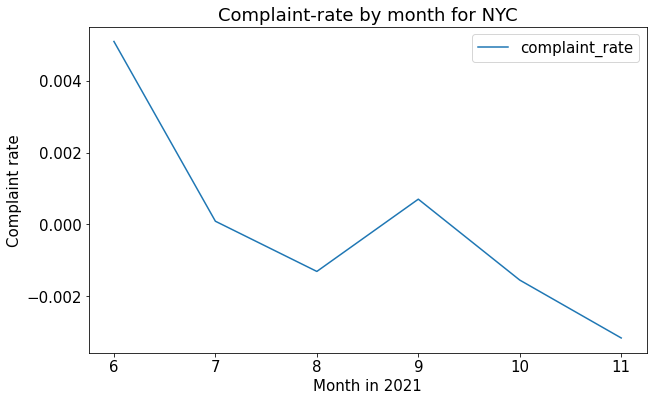

In [135]:
fig, ax = plt.subplots(figsize=(10,6))

Loud_music7.plot(x='month', y='complaint_rate', ax=ax)

plt.xlabel('Month in 2021')
plt.ylabel('Complaint rate')
plt.title("Complaint-rate by month for NYC") 
plt.show()

### Comments: From the above two plots, it seems like the complaint rates have gone down from June to August in 2021 across all the boroughs and NYC as a whole. The rates have gone up again in the month of September followed by a decline in the following months, reaching the lowest level in the past 6 months.

## 5.2. Question-2

#### 5.2.1. Create complaint-index variable & complaint-rate variable by zipcode by each month in 2021

In [152]:
Loud_music8=Loud_music4
#complaint-index variable
Loud_music8['complaint_index']=Loud_music8['num_complaints']/Loud_music8['Population']

#adding lag of complaint_index variable by zipcode by month
Loud_music8['complaint_index_1']=Loud_music8.sort_values(['incident_zip','month','year'],ascending=True)['complaint_index'].shift(1)

#add complaint-rate variable
#complaint-rate=change in complaints relative to population from last month to the current month
Loud_music8['complaint_rate']=Loud_music8['complaint_index']-Loud_music8['complaint_index_1']

Loud_music8 = Loud_music8.sort_values(['incident_zip','month','year'],ascending=True) #sort by group
Loud_music8.reset_index(inplace=True) #converts labels to column
#Loud_music8=Loud_music8[Loud_music8['borough'].isin(Borough)]
Loud_music8.head()

,index,incident_zip,month,year,num_complaints,Population,borough,complaint_index,complaint_index_1,complaint_rate
0,1209,10001.0,5,2021,31,21102.0,MANHATTAN,0.001469,NaN,NaN
2,689,10001.0,6,2021,135,21102.0,MANHATTAN,0.006397,0.001469,0.004928
4,759,10001.0,7,2021,113,21102.0,MANHATTAN,0.005355,0.006397,-0.001043
6,810,10001.0,8,2021,101,21102.0,MANHATTAN,0.004786,0.005355,-0.000569
8,653,10001.0,9,2021,144,21102.0,MANHATTAN,0.006824,0.004786,0.002038


#### 5.2.2 Estimating mean of complaint-rates in those 6 months of 2021 by zipcode

In [143]:
Loud_music9=Loud_music8.groupby(['incident_zip'])[['complaint_rate']].mean()
Loud_music9.reset_index(inplace=True) #converts labels to column
Loud_music9 = Loud_music9.sort_values(['complaint_rate'],ascending=False) #sort by complaint_rate
Loud_music9.head() #5 largest zipcodes in terms of the increase in complaints over 6 months in 2021

,incident_zip,complaint_rate
171,11430.0,0.002259
72,10466.0,0.001632
181,11697.0,0.001030
141,11366.0,0.000742
7,10009.0,0.000638


#### 5.2.3. Get unique zipcodes - their latitudes and longitudes

In [151]:
zipcode=df[['incident_zip','latitude','longitude']].drop_duplicates()
zipcode=zipcode.dropna() #dropping rows with missing values
zipcode = zipcode.sort_values(['incident_zip'],ascending=False) #sort by complaint_rate
zipcode = zipcode.groupby('incident_zip').first()
zipcode.reset_index(inplace=True) #converts labels to column
print(zipcode.shape)
zipcode.head()

(223, 3)


,incident_zip,latitude,longitude
0,00083,40.77685721094645,-73.97289511656156
1,10000,40.76954506851368,-73.97222659197847
2,10001,40.751847443470716,-73.99469438935554
3,10002,40.71426898709156,-73.99414186810355
4,10003,40.7341903980676,-73.99341484788401


#### 5.2.4. Merge Latitue & Longitude data with monthly zipcode level complaint rates 

In [156]:
zipcode.incident_zip = pd.to_numeric(zipcode.incident_zip, errors='coerce')
Loud_music10=Loud_music8.merge(zipcode, on='incident_zip', how='left')
Loud_music10.head()

,index,incident_zip,month,year,num_complaints,Population,borough,complaint_index,complaint_index_1,complaint_rate,latitude,longitude
0,1209,10001.0,5,2021,31,21102.0,MANHATTAN,0.001469,NaN,NaN,40.751847443470716,-73.99469438935554
1,689,10001.0,6,2021,135,21102.0,MANHATTAN,0.006397,0.001469,0.004928,40.751847443470716,-73.99469438935554
2,759,10001.0,7,2021,113,21102.0,MANHATTAN,0.005355,0.006397,-0.001043,40.751847443470716,-73.99469438935554
3,810,10001.0,8,2021,101,21102.0,MANHATTAN,0.004786,0.005355,-0.000569,40.751847443470716,-73.99469438935554
4,653,10001.0,9,2021,144,21102.0,MANHATTAN,0.006824,0.004786,0.002038,40.751847443470716,-73.99469438935554


#### 5.2.5. Animation that shows how the complaint rates evolved over the months in 2021 by zipcode 

In [179]:
# Takes in a subsetted data frame with the data for a given month, and the name of the month as a string. 
# Returns an animated mapbox density heatmap to show variation in call volume across time and space."""
# Loud_music10.latitude = pd.to_numeric(Loud_music10.latitude, errors='coerce')
# Loud_music10.longitude = pd.to_numeric(Loud_music10.longitude, errors='coerce')


# def plot_calls(month_df, year):
#     fig = px.density_mapbox(month_df, lat=month_df['latitude'], 
#                             lon=month_df['longitude'], 
#                             radius=2,
#                             animation_frame=month_df['month'],
#                             hover_name=None, 
#                             hover_data=['complaint_rate'],
#                             width=550, height=550,
#     color_continuous_scale=px.colors.sequential.Inferno
#                                                        )
#     fig.update_layout(mapbox_style="carto-positron",   
#                       mapbox_zoom=8.5, mapbox_center = {
#                       "lat": 40.6885, "lon": -73.93211},)
                      
#     fig.layout.coloraxis.showscale = False    
                      
#     fig.update_layout(title={
#         'text': 'Call Volume in {}'.format(year),
#         'x':0.5,
#         'xanchor': 'center',
#         'yanchor': 'top'}),

#     font=dict(family="silom",
#               size=14, color="#58508d")

#     fig.update_layout(transition = {'duration': 10})

#     fig.show()

In [180]:
# plot_calls(Loud_music10,2021)